# Hoja de Trabajo 6

#### Javier Valle, 20159
#### Roberto Ríos, 20979

In [33]:
# Imports necesarios.
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

### 1. Cree  una  variable  dicotómica  por  cada  una  de  las  categorías  de  la  variable  respuesta categórica que creó en hojas anteriores. Debería tener 3 variables dicotómicas (valores 0 y 1) una que diga si la vivienda es cara o no, media o no, económica o no.

In [22]:
# Abriendo el archivo de csv.
df = pd.read_csv('archivo_clasificado.csv')

# Agarrando el DF y leyendo la clasificación de la casa.
df["Clasificacion"]

# Usando el get_dummies.
dummies = pd.get_dummies(df["Clasificacion"])

# Eliminamos la última columna del DataFrame
dummies = dummies.drop(dummies.columns[-1], axis=1)

print(dummies)

# Renombreando las columnas.
dummies = dummies.rename(columns={0: 'vivienda_económica', 1: 'vivienda_media', 2: 'vivienda_cara'})

# Uniendo los DF.
df = pd.concat([df, dummies], axis=1)

df

      0  1  2
0     0  1  0
1     1  0  0
2     0  1  0
3     1  0  0
4     0  1  0
...  .. .. ..
1455  1  0  0
1456  0  1  0
1457  0  1  0
1458  1  0  0
1459  1  0  0

[1460 rows x 3 columns]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Precio,Clasificacion,vivienda_económica,vivienda_media,vivienda_cara
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,208500,1,0,1,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,181500,0,1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,223500,1,0,1,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,140000,0,1,0,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,250000,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,8,2007,WD,Normal,175000,175000,0,1,0,0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,2,2010,WD,Normal,210000,210000,1,0,1,0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,5,2010,WD,Normal,266500,266500,1,0,1,0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,4,2010,WD,Normal,142125,142125,0,1,0,0


### 2. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.

Clasificación:  0       1
1       0
2       1
3       0
4       1
       ..
1455    0
1456    1
1457    1
1458    0
1459    0
Name: Clasificacion, Length: 1460, dtype: int64
Precisión: 0.997716894977169
OverallCond:  0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64
Precisión: 0.639269406392694
Predicción: [5 5 5 6 5 8 5 5 5 5 5 5 5 5 5 5 5 5 8 7 5 5 5 5 5 6 5 5 5 5 5 5 6 5 5 5 5
 5 5 5 6 5 5 5 5 5 8 5 5 7 5 5 5 5 5 5 7 5 5 6 7 5 7 5 5 5 7 5 7 5 5 6 5 5
 6 5 5 5 5 7 5 7 7 5 7 5 5 5 5 5 5 5 5 5 5 5 5 6 7 7 5 5 7 5 7 7 5 6 5 7 7
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 7 5 5 5 5 7 5 8 5 5 7 5 5 5 7
 5 5 5 5 5 6 6 5 8 5 5 8 5 5 5 5 5 7 7 5 5 5 5 5 5 5 6 7 7 6 5 5 6 6 5 5 6
 5 5 5 5 5 5 7 5 5 7 5 5 7 6 6 5 5 6 5 7 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 5 5
 7 7 5 5 5 7 7 5 5 7 5 5 5 7 5 7 5 6 5 5 5 5 6 5 5 5 7 5 8 5 6 5 5 5 8 5 5
 5 5 5 6 8 5 5 6 5 7 5 7 7 5 7 6 5 8 7 5 5 5 5 5 5 5 5 5 5 5 

[Text(0.5431034482758621, 0.9, '5 <= 1983.5\ngini = 0.639\nsamples = 1022\nvalue = [1, 5, 17, 45, 564, 187, 137, 52, 14]'),
 Text(0.27586206896551724, 0.7, '5 <= 1983.5\ngini = 0.776\nsamples = 615\nvalue = [1, 4, 17, 45, 180, 174, 130, 51, 13]'),
 Text(0.13793103448275862, 0.5, '5 <= 0.5\ngini = 0.715\nsamples = 431\nvalue = [1, 4, 16, 39, 169, 139, 56, 7, 0]'),
 Text(0.06896551724137931, 0.3, '5 <= 0.5\ngini = 0.673\nsamples = 84\nvalue = [0, 1, 1, 7, 17, 41, 17, 0, 0]'),
 Text(0.034482758620689655, 0.1, 'gini = 0.612\nsamples = 68\nvalue = [0, 0, 0, 5, 15, 38, 10, 0, 0]'),
 Text(0.10344827586206896, 0.1, 'gini = 0.734\nsamples = 16\nvalue = [0, 1, 1, 2, 2, 3, 7, 0, 0]'),
 Text(0.20689655172413793, 0.3, '5 <= 1959.5\ngini = 0.705\nsamples = 347\nvalue = [1, 3, 15, 32, 152, 98, 39, 7, 0]'),
 Text(0.1724137931034483, 0.1, 'gini = 0.778\nsamples = 162\nvalue = [1, 3, 10, 26, 50, 45, 22, 5, 0]'),
 Text(0.2413793103448276, 0.1, 'gini = 0.604\nsamples = 185\nvalue = [0, 0, 5, 6, 102, 53, 1

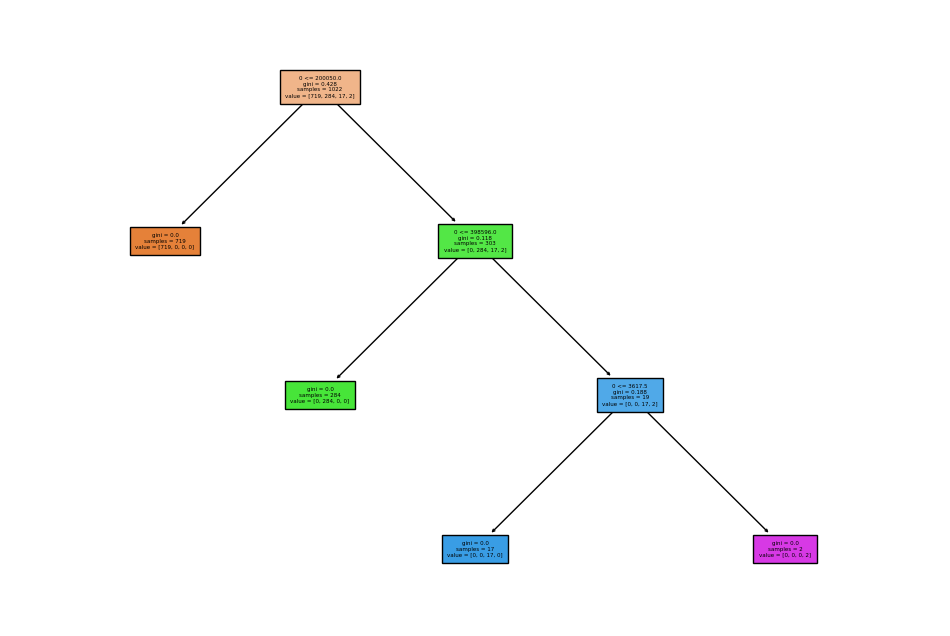

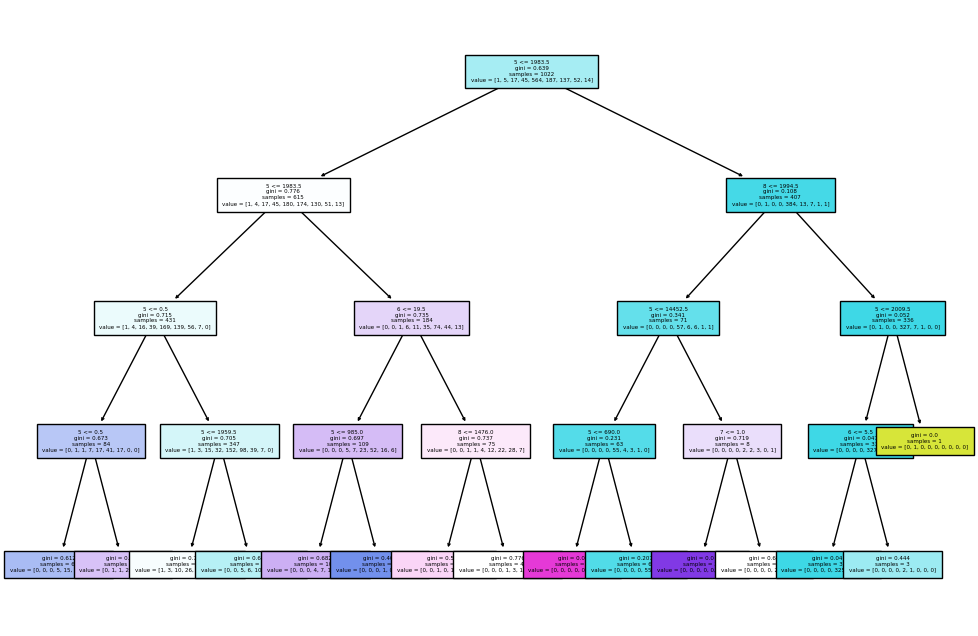

In [31]:

# Conjuntos de entrenamiento y prueba de la Hoja 5.

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'Clasificacion'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("Clasificación: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# # Accurancy.
print("Precisión:", clf.score(X_test, y_test))

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

# Abriendo el archivo clasficado.
datos = pd.read_csv('archivo_clasificado.csv')

# Limpieza de datos.
datos = datos.replace(to_replace='',value=0)
datos = datos.fillna(0)
cat = datos.select_dtypes(include=['object']).columns.to_list()
num = datos.select_dtypes(include=['number']).columns.to_list()

# Pasando todo a un Dataframe.
x = pd.DataFrame()
x[num] = datos[num]
x[cat] = datos[cat].apply(lambda x: pd.factorize(x)[0])
res = 'OverallCond'
X = x.drop(res, axis=1)
y = datos[res]

# Imprimiendo la clasificación.
print("OverallCond: ", y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Crea un clasificador de árbol de decisión
clf = tree.DecisionTreeClassifier( max_depth=4 )

# Entrena el clasificador en el conjunto de entrenamiento
clf.fit(X_train, y_train)


# Accurancy.
print("Precisión:", clf.score(X_test, y_test))

# Haciendo una predicción.
y_pred = clf.predict(X_test)

print("Predicción:", y_pred)

fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(clf, fontsize=4, feature_names=y, filled=True)

### 3. Elabore  un  modelo  de  regresión  logística  para  conocer  si  una  vivienda  es  cara  o  no, utilizando el conjunto de entrenamiento y explique los resultados a los que llega. El experimento debe ser reproducible por lo que debe fijar que los conjuntos de entrenamiento y prueba sean los mismos siempre que se ejecute el código. Use validación cruzada. 

In [55]:
# Abriendo el archivo de csv.
df = pd.read_csv('archivo_clasificado.csv')

# Agarrando el DF y leyendo la clasificación de la casa.
df["Clasificacion"]

# Usando el get_dummies.
dummies = pd.get_dummies(df["Clasificacion"])

# Eliminamos la última columna del DataFrame
dummies = dummies.drop(dummies.columns[-1], axis=1)

print(dummies)

# Renombreando las columnas.
dummies = dummies.rename(columns={0: 'vivienda_económica', 1: 'vivienda_media', 2: 'vivienda_cara'})

# Uniendo los DF.
df = pd.concat([df, dummies], axis=1)

df

df = pd.get_dummies(df)

# Definir las variables predictoras y la variable objetivo
X = df.drop(['Clasificacion', 'vivienda_económica', 'vivienda_media', 'vivienda_cara'], axis=1)
y = df['vivienda_cara']

X = df.dropna().drop(['Clasificacion', 'vivienda_económica', 'vivienda_media', 'vivienda_cara'], axis=1)
y = df.dropna()['vivienda_cara']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión logística
logreg = LogisticRegression()

# Entrenar el modelo
logreg.fit(X_train, y_train)

# Realizar validación cruzada para obtener un score más preciso
scores = cross_val_score(logreg, X, y, cv=5)
print('Scores de validación cruzada:', scores)

# Calcular el score en el conjunto de prueba
score = logreg.score(X_test, y_test)
print('Score en el conjunto de prueba:', score)


      0  1  2
0     0  1  0
1     1  0  0
2     0  1  0
3     1  0  0
4     0  1  0
...  .. .. ..
1455  1  0  0
1456  0  1  0
1457  0  1  0
1458  1  0  0
1459  1  0  0

[1460 rows x 3 columns]


C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Scores de validación cruzada: [0.98222222 0.97767857 0.97767857 0.97767857 0.98214286]
Score en el conjunto de prueba: 0.9792284866468842
